### 构造原始数据

In [466]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

r = np.random.randn(200)*0.8
x1 = np.linspace(-3, 1, 200)
x2 = np.linspace(-1, 3, 200)
y1 = x1*x1 + 2*x1 - 2 + r
y2 = -x2*x2 + 2*x2 + 2 + r

X = np.hstack(([x1, y1],[x2, y2]))                     # 输入样本 X，维度：2 x 400
Y = np.hstack((np.zeros((1,200)),np.ones((1,200))))    # 输出标签 Y

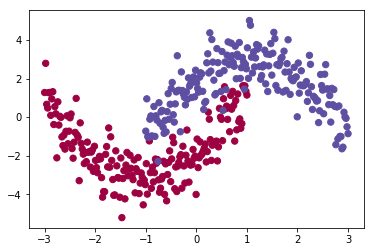

In [467]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.show()

### 定义神经网络输入层、隐藏层、输出层各神经元个数

In [468]:
m = X.shape[1]      # 样本个数
n_x = X.shape[0]    # 输入层神经元个数
n_h = 3             # 隐藏层神经元个数
n_y = Y.shape[0]    # 输出层神经元个数

### 网络参数 W 和 b 初始化

In [469]:
W1 = np.random.randn(n_h,n_x)*0.01
b1 = np.zeros((n_h,1))
W2 = np.random.randn(n_y,n_h)*0.01
b2 = np.zeros((n_y,1))

    
assert (W1.shape == (n_h, n_x))
assert (b1.shape == (n_h, 1))
assert (W2.shape == (n_y, n_h))
assert (b2.shape == (n_y, 1))
    
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}

### 正向传播过程

定义 sigmoid 函数：

In [470]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    """
    s = 1/(1+np.exp(-x))
    return s

定义正向传播过程：

In [471]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### 损失函数

In [472]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    # 计算交叉熵损失函数
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost = - 1/m * np.sum(logprobs)
    
    cost = np.squeeze(cost)     
    
    return cost

### 反向传播过程

In [473]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # 反向求导
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    # 存储各个梯度值
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### 网络参数更新

In [474]:
def update_parameters(parameters, grads, learning_rate = 1.5):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 搭建整个神经网络模型

In [475]:
def nn_model(X, Y, n_h = 3, num_iterations = 10000, print_cost=False):
    
    m = X.shape[1]      # 样本个数
    n_x = X.shape[0]    # 输入层神经元个数
    n_y = Y.shape[0]    # 输出层神经元个数
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    # 迭代训练
    J = []     # 存储损失函数
    for i in range(0, num_iterations):

        A2, cache = forward_propagation(X, parameters)            # 正向传播
        cost = compute_cost(A2, Y, parameters)                    # 计算损失函数
        grads = backward_propagation(parameters, cache, X, Y)     # 反向传播
        parameters = update_parameters(parameters, grads)         # 更新权重
        J.append(cost)
        # 每隔 1000 次训练，打印 cost
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### 模型训练

In [476]:
parameters = nn_model(X, Y, n_h = 3, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.061660
Cost after iteration 2000: 0.057990
Cost after iteration 3000: 0.056222
Cost after iteration 4000: 0.055270
Cost after iteration 5000: 0.054703
Cost after iteration 6000: 0.061273
Cost after iteration 7000: 0.054856
Cost after iteration 8000: 0.054887
Cost after iteration 9000: 0.054916


### 模型预测

In [477]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    #predictions = A2 > 0.5
    predictions = np.zeros_like(A2)
    predictions[A2 > 0.5] = 1
    
    return predictions

In [478]:
y_pred = predict(parameters,X)
accuracy = np.mean(y_pred == Y)
print(accuracy)

0.9825


In [479]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

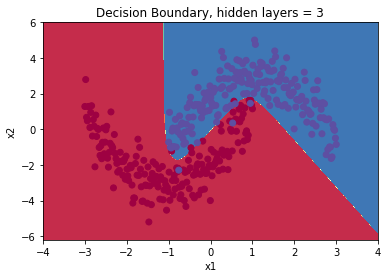

In [480]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary, hidden layers = 3")
plt.show()

### 隐藏层神经元个数对分类效果的影响

Cost after iteration 0: 0.693111
Cost after iteration 1000: 0.238894
Cost after iteration 2000: 0.235903
Cost after iteration 3000: 0.234773
Cost after iteration 4000: 0.234124
Cost after iteration 5000: 0.234138
Cost after iteration 6000: 0.234004
Cost after iteration 7000: 0.233876
Cost after iteration 8000: 0.233748
Cost after iteration 9000: 0.233624
0.8825


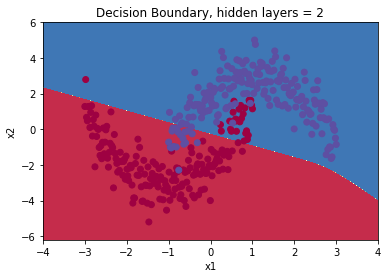

In [481]:
# n_h = 2
parameters = nn_model(X, Y, n_h = 2, num_iterations = 10000, print_cost=True)
y_pred = predict(parameters,X)
accuracy = np.mean(y_pred == Y)
print(accuracy)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary, hidden layers = 2")
plt.show()

Cost after iteration 0: 0.693173
Cost after iteration 1000: 0.060867
Cost after iteration 2000: 0.051265
Cost after iteration 3000: 0.049857
Cost after iteration 4000: 0.048123
Cost after iteration 5000: 0.046842
Cost after iteration 6000: 0.046136
Cost after iteration 7000: 0.045611
Cost after iteration 8000: 0.045240
Cost after iteration 9000: 0.044973
0.985


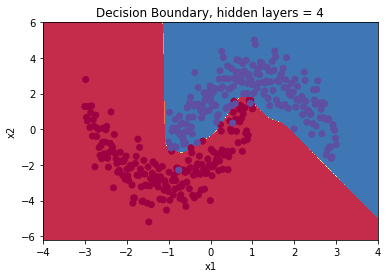

In [482]:
# n_h = 4
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
y_pred = predict(parameters,X)
accuracy = np.mean(y_pred == Y)
print(accuracy)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary, hidden layers = 4")
plt.show()